# Hello world

In [20]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(iterations=1000):
    points = genfromtxt("./data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))



1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados aquiVisualizar o documento. Esse exemplo foi trabalhado em sala de aula. 

In [21]:
run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

In [22]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        print("\t\t Iteration {0},RSS  = {1};".format(i,compute_error_for_line_given_points(b, m, points)))
    return [b, m]
run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
		 Iteration 0,RSS  = 1484.586557408649;
		 Iteration 1,RSS  = 457.8542575737673;
		 Iteration 2,RSS  = 199.50998572553894;
		 Iteration 3,RSS  = 134.50591058200533;
		 Iteration 4,RSS  = 118.14969342239947;
		 Iteration 5,RSS  = 114.0341490603815;
		 Iteration 6,RSS  = 112.99857731713661;
		 Iteration 7,RSS  = 112.7379818756847;
		 Iteration 8,RSS  = 112.67238435909097;
		 Iteration 9,RSS  = 112.65585181499746;
		 Iteration 10,RSS  = 112.65166489759584;
		 Iteration 11,RSS  = 112.65058436150113;
		 Iteration 12,RSS  = 112.65028544701505;
		 Iteration 13,RSS  = 112.6501832029397;
		 Iteration 14,RSS  = 112.65013044507197;
		 Iteration 15,RSS  = 112.65009013922885;
		 Iteration 16,RSS  = 112.65005296694635;
		 Iteration 17,RSS  = 112.65001658353181;
		 Iteration 18,RSS  = 112.64998039901862;
		 Iteration 19,RSS  = 112.64994426496074;
		 Iteration 20,RSS  = 112.64990814400619;
		 Iteration 21,RSS  = 112.64987

		 Iteration 348,RSS  = 112.63809122274986;
		 Iteration 349,RSS  = 112.63805528494437;
		 Iteration 350,RSS  = 112.63801934768121;
		 Iteration 351,RSS  = 112.63798341096066;
		 Iteration 352,RSS  = 112.63794747478259;
		 Iteration 353,RSS  = 112.6379115391469;
		 Iteration 354,RSS  = 112.63787560405378;
		 Iteration 355,RSS  = 112.63783966950305;
		 Iteration 356,RSS  = 112.63780373549474;
		 Iteration 357,RSS  = 112.63776780202903;
		 Iteration 358,RSS  = 112.63773186910554;
		 Iteration 359,RSS  = 112.63769593672463;
		 Iteration 360,RSS  = 112.63766000488606;
		 Iteration 361,RSS  = 112.6376240735899;
		 Iteration 362,RSS  = 112.63758814283621;
		 Iteration 363,RSS  = 112.63755221262478;
		 Iteration 364,RSS  = 112.63751628295586;
		 Iteration 365,RSS  = 112.63748035382919;
		 Iteration 366,RSS  = 112.637444425245;
		 Iteration 367,RSS  = 112.63740849720321;
		 Iteration 368,RSS  = 112.6373725697036;
		 Iteration 369,RSS  = 112.63733664274642;
		 Iteration 370,RSS  = 112.637300716

		 Iteration 702,RSS  = 112.62540307535392;
		 Iteration 703,RSS  = 112.62536732908134;
		 Iteration 704,RSS  = 112.62533158334847;
		 Iteration 705,RSS  = 112.62529583815511;
		 Iteration 706,RSS  = 112.62526009350137;
		 Iteration 707,RSS  = 112.6252243493871;
		 Iteration 708,RSS  = 112.6251886058126;
		 Iteration 709,RSS  = 112.62515286277758;
		 Iteration 710,RSS  = 112.62511712028207;
		 Iteration 711,RSS  = 112.62508137832616;
		 Iteration 712,RSS  = 112.62504563690989;
		 Iteration 713,RSS  = 112.62500989603292;
		 Iteration 714,RSS  = 112.62497415569558;
		 Iteration 715,RSS  = 112.6249384158978;
		 Iteration 716,RSS  = 112.62490267663948;
		 Iteration 717,RSS  = 112.62486693792067;
		 Iteration 718,RSS  = 112.62483119974138;
		 Iteration 719,RSS  = 112.62479546210163;
		 Iteration 720,RSS  = 112.62475972500128;
		 Iteration 721,RSS  = 112.62472398844037;
		 Iteration 722,RSS  = 112.62468825241896;
		 Iteration 723,RSS  = 112.62465251693702;
		 Iteration 724,RSS  = 112.6246167

3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...


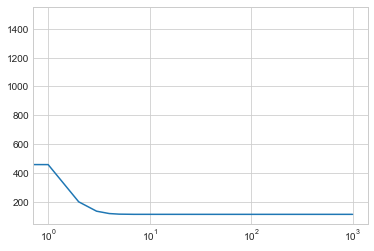

After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


In [23]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    x = []
    y = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        x.append(i)
        y.append(compute_error_for_line_given_points(b, m, points))
    
    
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    plt.plot(x, y)
    plt.xscale('log')
    plt.show()
    

    return [b, m]

run()

4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.